In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 803s 70us/step


In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\JAWAD\anaconda3\envs\Jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Epoch 1/10
300/300 - 7s - 24ms/step - accuracy: 0.9230 - loss: 0.2636 - val_accuracy: 0.9817 - val_loss: 0.0630
Epoch 2/10
300/300 - 6s - 20ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9863 - val_loss: 0.0414
Epoch 3/10
300/300 - 6s - 19ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9867 - val_loss: 0.0381
Epoch 4/10
300/300 - 6s - 21ms/step - accuracy: 0.9896 - loss: 0.0354 - val_accuracy: 0.9884 - val_loss: 0.0394
Epoch 5/10
300/300 - 6s - 21ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9896 - val_loss: 0.0339
Epoch 6/10
300/300 - 6s - 20ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9875 - val_loss: 0.0377
Epoch 7/10
300/300 - 6s - 21ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 8/10
300/300 - 6s - 20ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9902 - val_loss: 0.0264
Epoch 9/10
300/300 - 6s - 20ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9912 - val_loss:

In [5]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03237227350473404
Test accuracy: 0.989799976348877


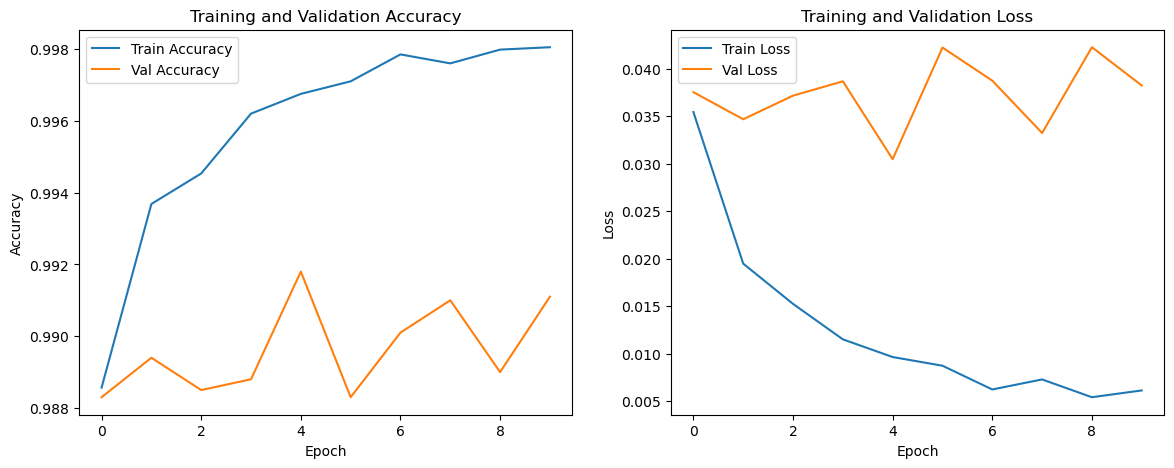

In [11]:
def plot_history(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


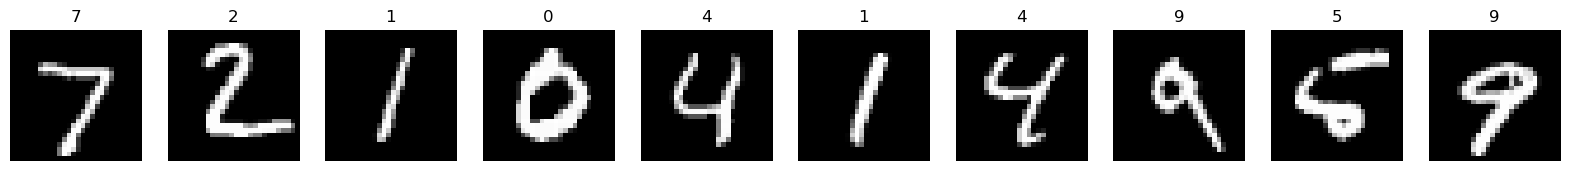

In [14]:
predictions = model.predict(X_test)

# Plot some predictions
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(np.argmax(predictions[i]))
    axes[i].axis('off')
plt.show()